In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [272]:
import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta

---

##### useful datasets:
- **core.dim_contracts** | all of the ethereum contracts deployed
- **core.dim_labels** | labels for ethereum addresses
---
- **core.ez_balance_deltas** | contains the block level balance changes for both tokens and ETH for all wallets and contracts
- **core.ez_current_balances** | current balances of wallets (excluding 0 balances)
- **core.ez_eth_transfers** | all ethereum transfers
- **core.ez_token_transfers** | all token transfers
---
- **core.fact_blocks** | block level data
- **core.fact_transactions** | transactions level data


---

### Blocks

In [5]:
df = pd.read_csv(r'D:\blocks_all.csv', index_col=[0])

In [6]:
df.head()

,block_number,block_timestamp,transactions_count,difficulty,total_difficulty,extra_data,gas_limit,gas_used,hash,parent_hash,miner,nonce,receipts_root,sha3_uncles,size
0,1,2015-07-30 15:26:28,0.0,1.717148e+10,3.435135e+10,0x476574682f76312e302e302f6c696e75782f676f312e...,5000.0,0.0,0x88e96d4537bea4d9c05d12549907b32561d3bf31f45a...,0xd4e56740f876aef8c010b86a40d5f56745a118d0906a...,0x05a56e2d52c817161883f50c441c3228cfe54d9f,6.024643e+18,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,537.0
1,2,2015-07-30 15:26:57,0.0,1.716310e+10,5.151445e+10,0x476574682f76312e302e302d30636463373634372f6c...,5000.0,0.0,0xb495a1d7e6663152ae92708da4843337b958146015a2...,0x88e96d4537bea4d9c05d12549907b32561d3bf31f45a...,0xdd2f1e6e498202e86d8f5442af596580a4f03c2c,1.328223e+19,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,544.0
2,3,2015-07-30 15:27:28,0.0,1.715472e+10,6.866916e+10,0x476574682f76312e302e302d66633739643332642f6c...,5000.0,0.0,0x3d6122660cc824376f11ee842f83addc3525e2dd6756...,0xb495a1d7e6663152ae92708da4843337b958146015a2...,0x5088d623ba0fcf0131e0897a91734a4d83596aa0,3.356102e+18,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x6b17b938c6e4ef18b26ad81b9ca3515f27fd9c4e82aa...,1079.0
3,4,2015-07-30 15:27:57,0.0,1.714634e+10,8.581550e+10,0x59617465732052616e64616c6c202d2045746865724e...,5000.0,0.0,0x23adf5a3be0f5235b36941bcb29b62504278ec5b9cdf...,0x3d6122660cc824376f11ee842f83addc3525e2dd6756...,0xc8ebccc5f5689fa8659d83713341e5ad19349448,1.400264e+19,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x83a8da8965660cb6bdf0c37f1b111778e49753c4213b...,1079.0
4,5,2015-07-30 15:28:03,0.0,1.715471e+10,1.029702e+11,0x476574682f76312e302e302f6c696e75782f676f312e...,5000.0,0.0,0xf37c632d361e0a93f08ba29b1a2c708d9caa3ee19d1e...,0x23adf5a3be0f5235b36941bcb29b62504278ec5b9cdf...,0x05a56e2d52c817161883f50c441c3228cfe54d9f,1.813425e+19,0x56e81f171bcc55a6ff8345e692c0f86e5b48e01b996c...,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,537.0


#### Different Correlations

In [ ]:
# general correlation stable
print('Overall Correlations')
corr_all = df.corr()

In [215]:
corr_all = corr_all.drop(columns = ['nonce'], index = ['nonce'])

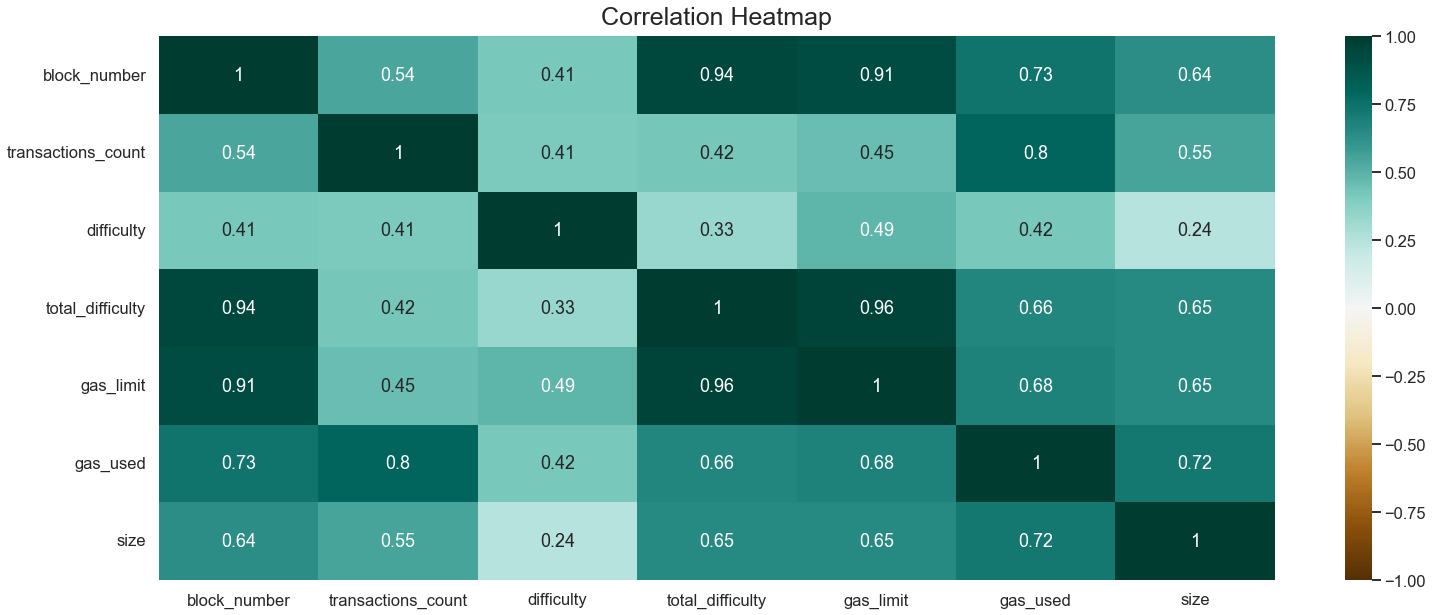

In [224]:
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(corr_all, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':25}, pad=12)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [32]:
# correlations tables for different years

corr_2015 = df[df['block_timestamp'].str.startswith('2015')].corr().drop(columns = ['nonce'], index = ['nonce'])
corr_2016 = df[df['block_timestamp'].str.startswith('2016')].corr().drop(columns = ['nonce'], index = ['nonce'])
corr_2017 = df[df['block_timestamp'].str.startswith('2017')].corr().drop(columns = ['nonce'], index = ['nonce'])
corr_2018 = df[df['block_timestamp'].str.startswith('2018')].corr().drop(columns = ['nonce'], index = ['nonce'])
corr_2019 = df[df['block_timestamp'].str.startswith('2019')].corr().drop(columns = ['nonce'], index = ['nonce'])
corr_2020 = df[df['block_timestamp'].str.startswith('2020')].corr().drop(columns = ['nonce'], index = ['nonce'])
corr_2021 = df[df['block_timestamp'].str.startswith('2021')].corr().drop(columns = ['nonce'], index = ['nonce'])
corr_2022 = df[df['block_timestamp'].str.startswith('2022')].corr().drop(columns = ['nonce'], index = ['nonce'])
corr_2023 = df[df['block_timestamp'].str.startswith('2023')].corr().drop(columns = ['nonce'], index = ['nonce'])

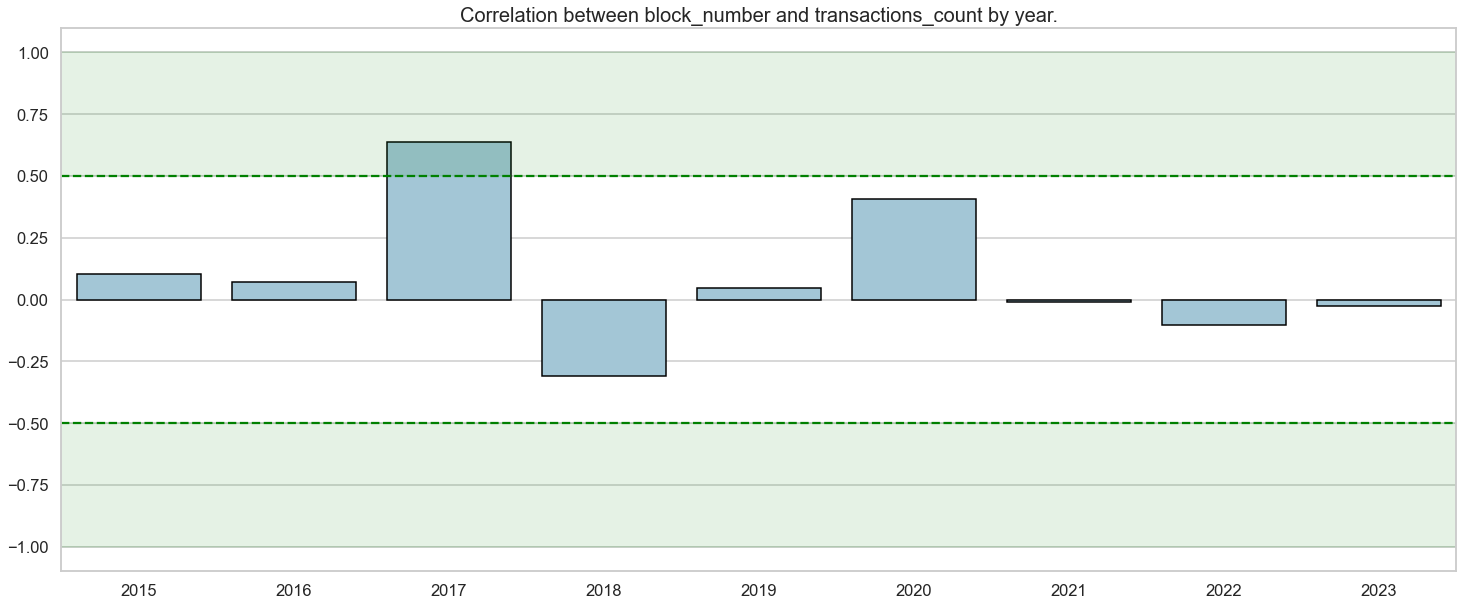

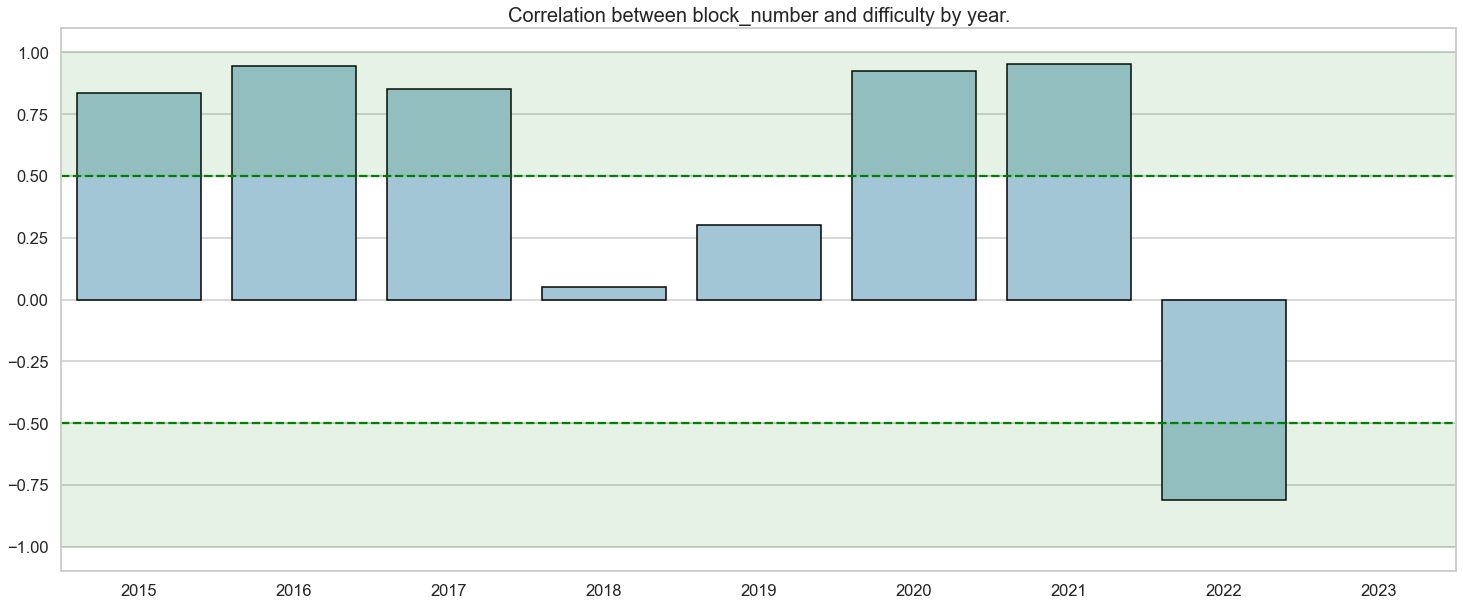

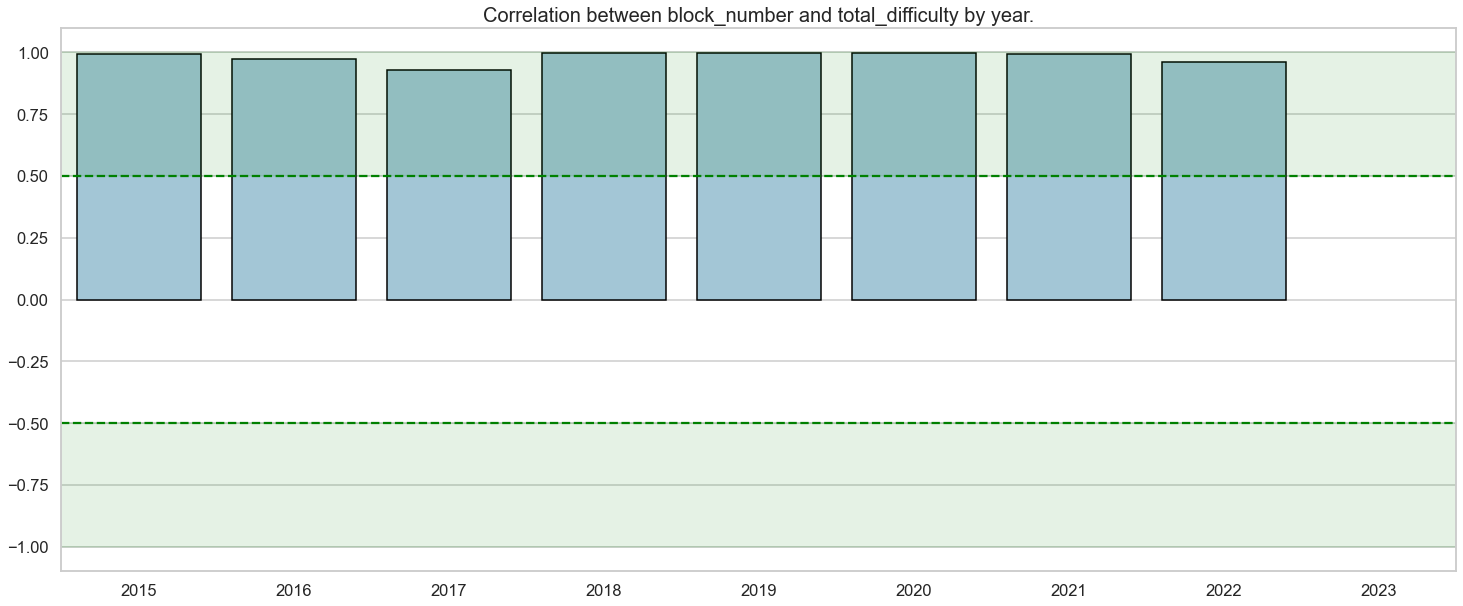

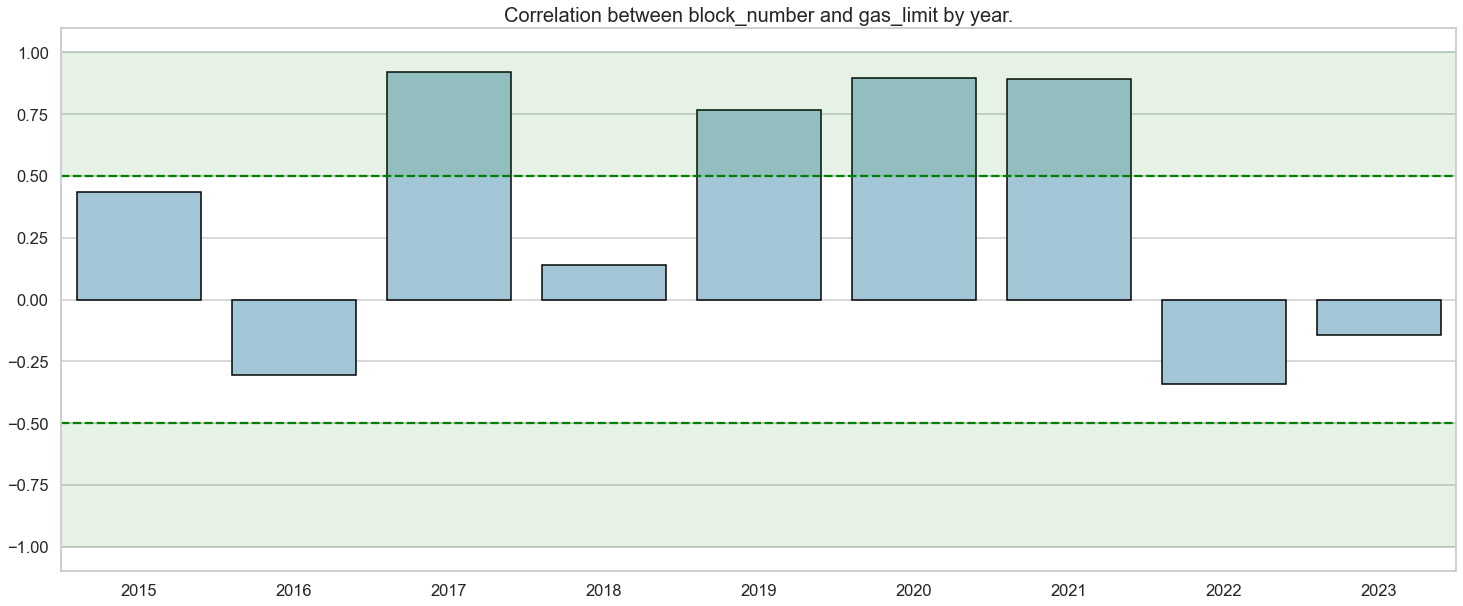

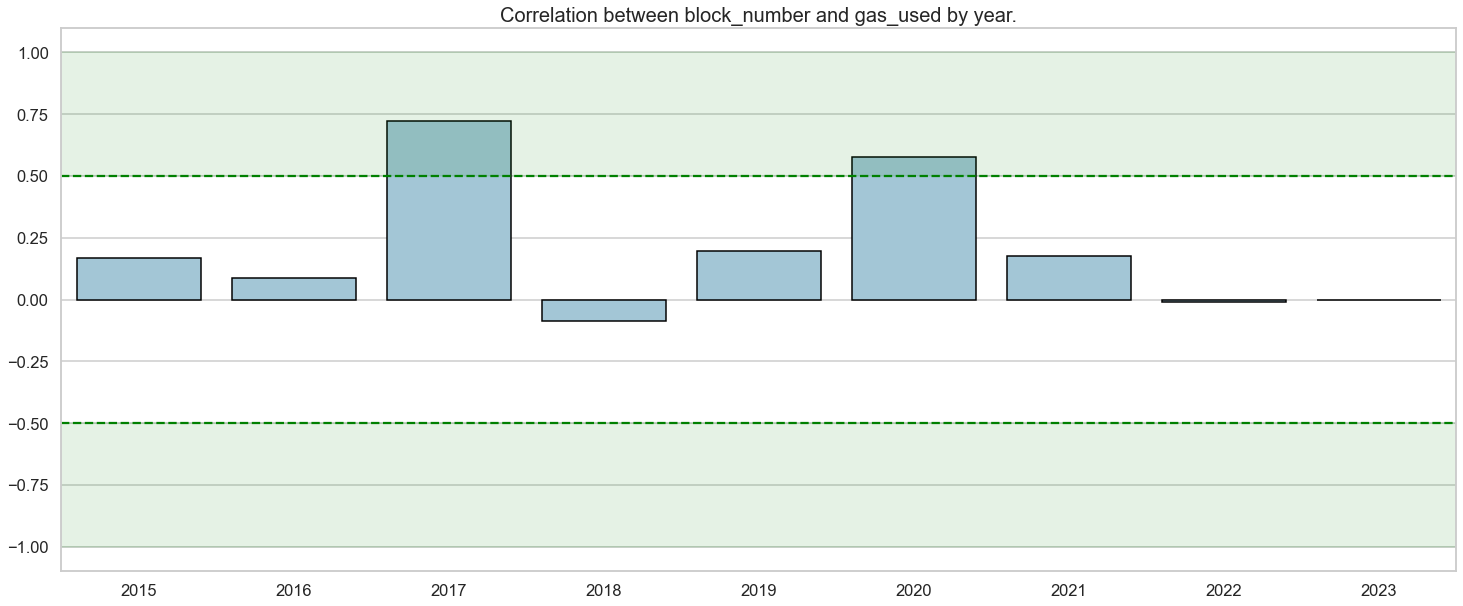

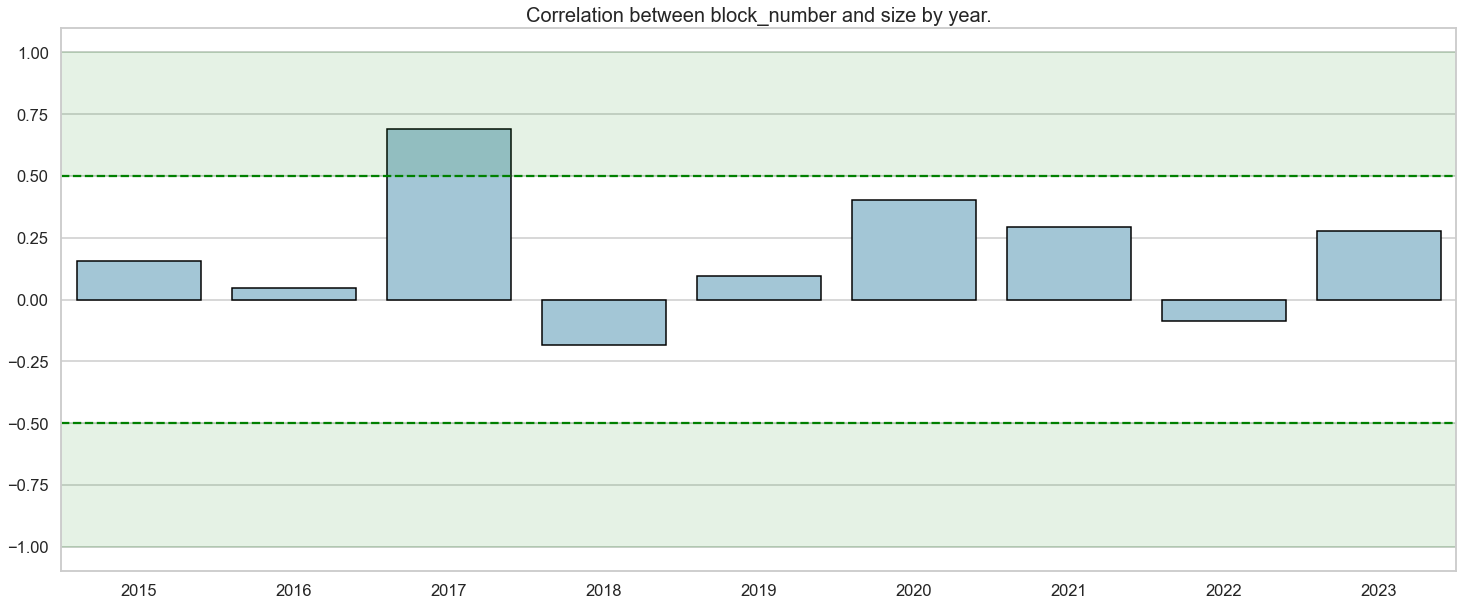

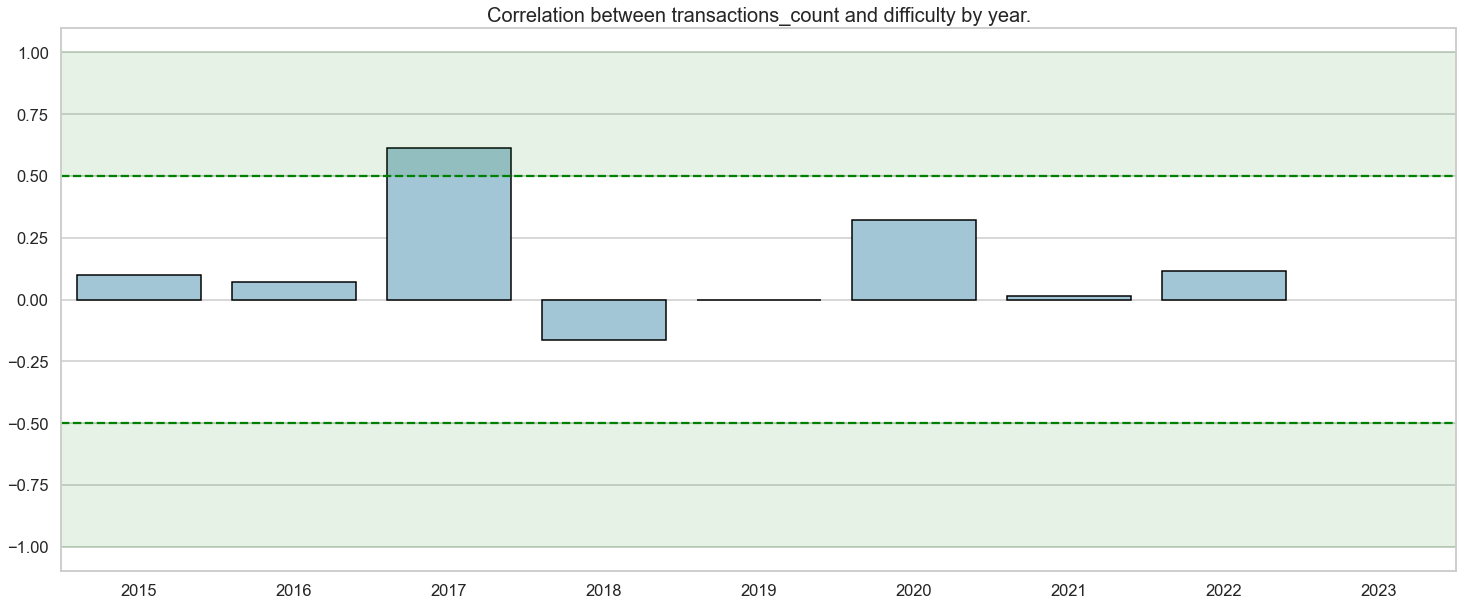

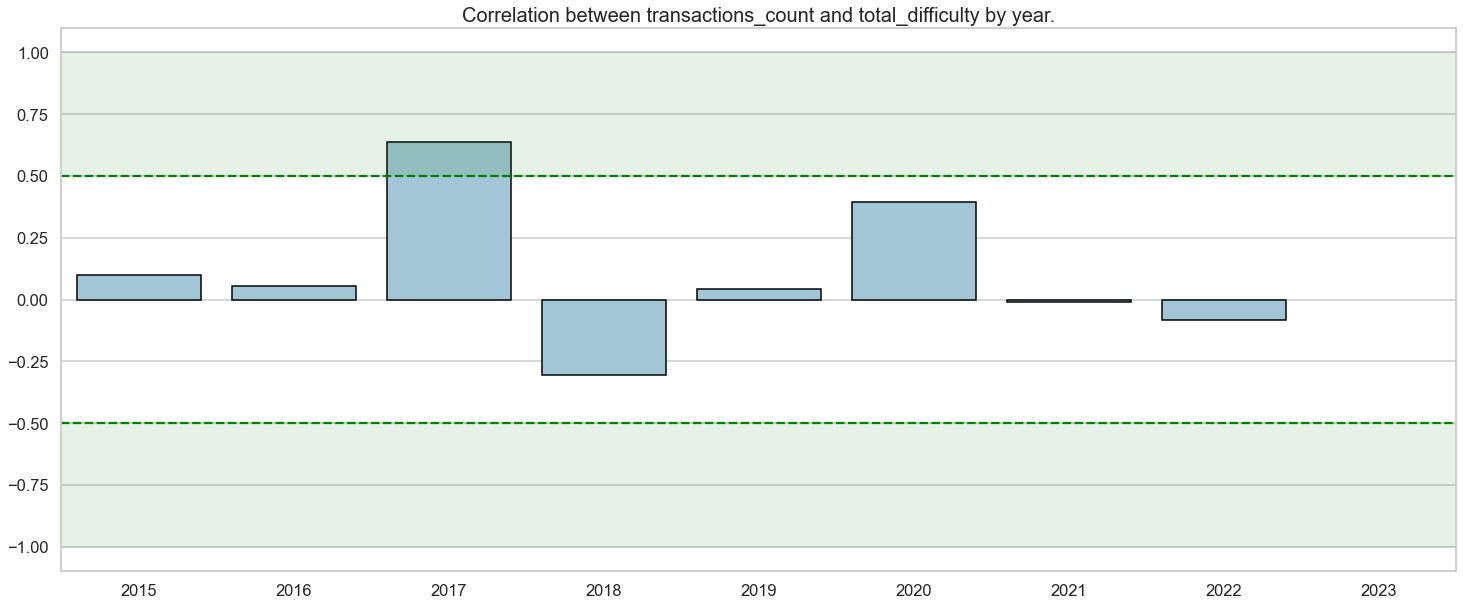

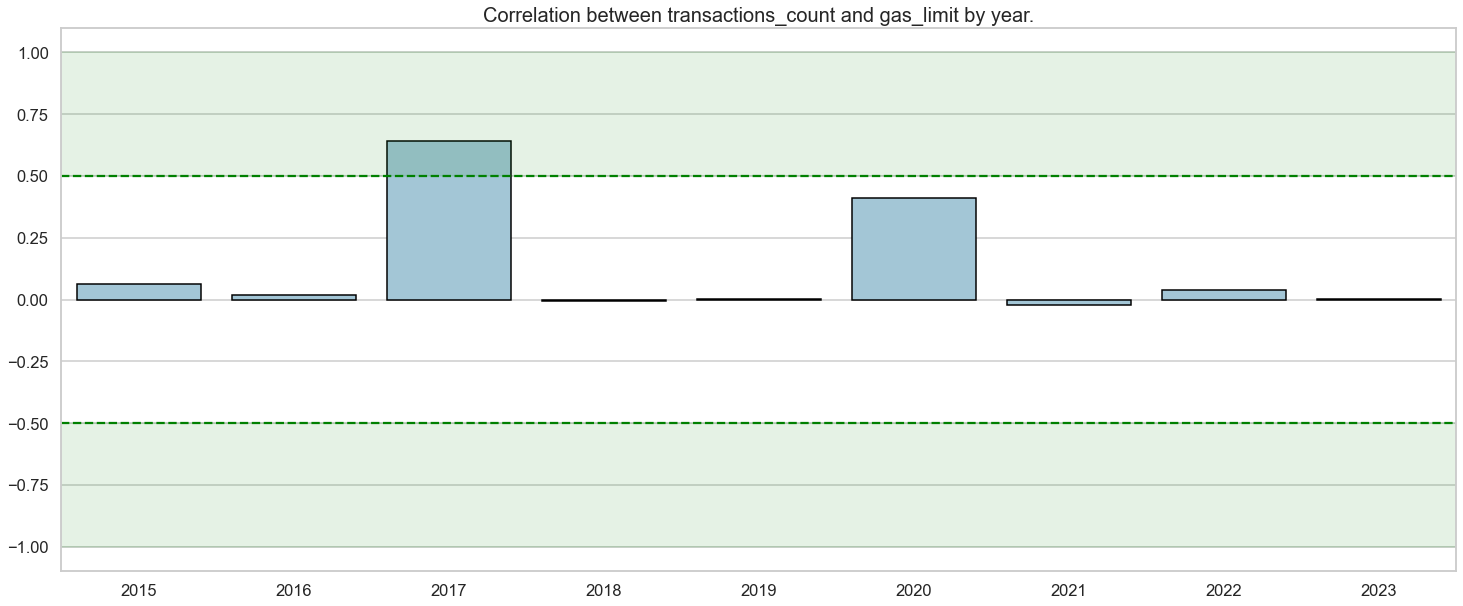

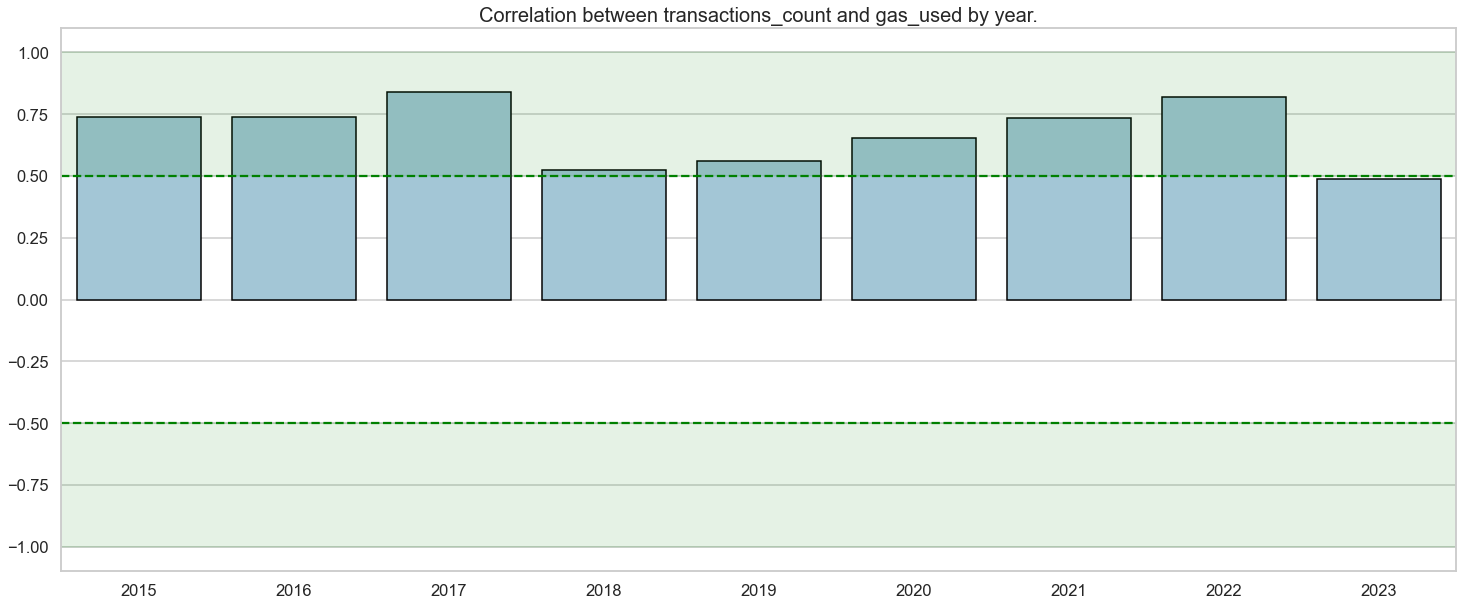

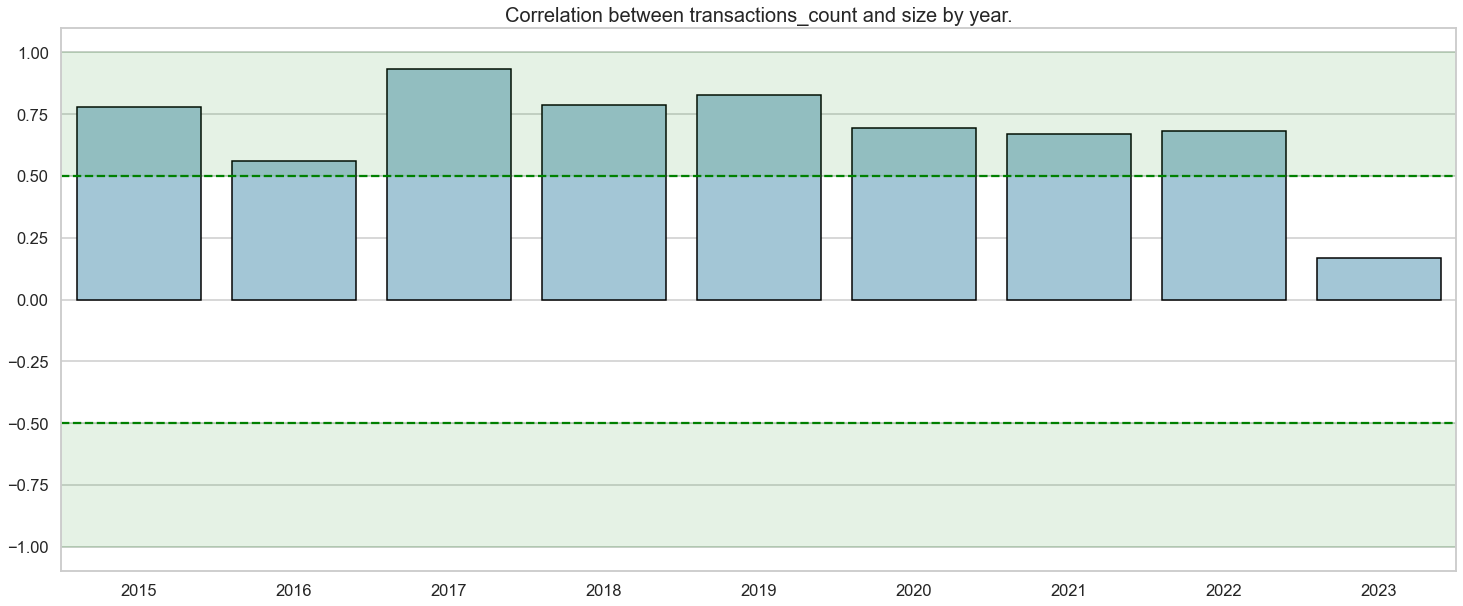

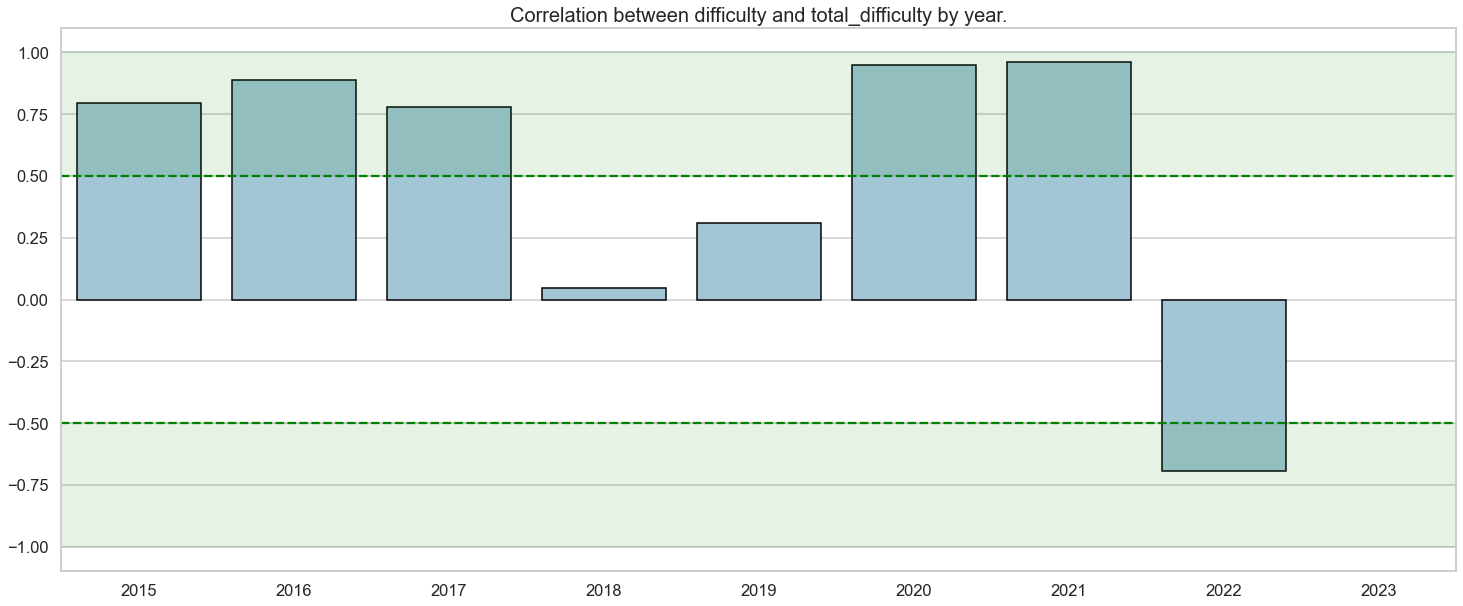

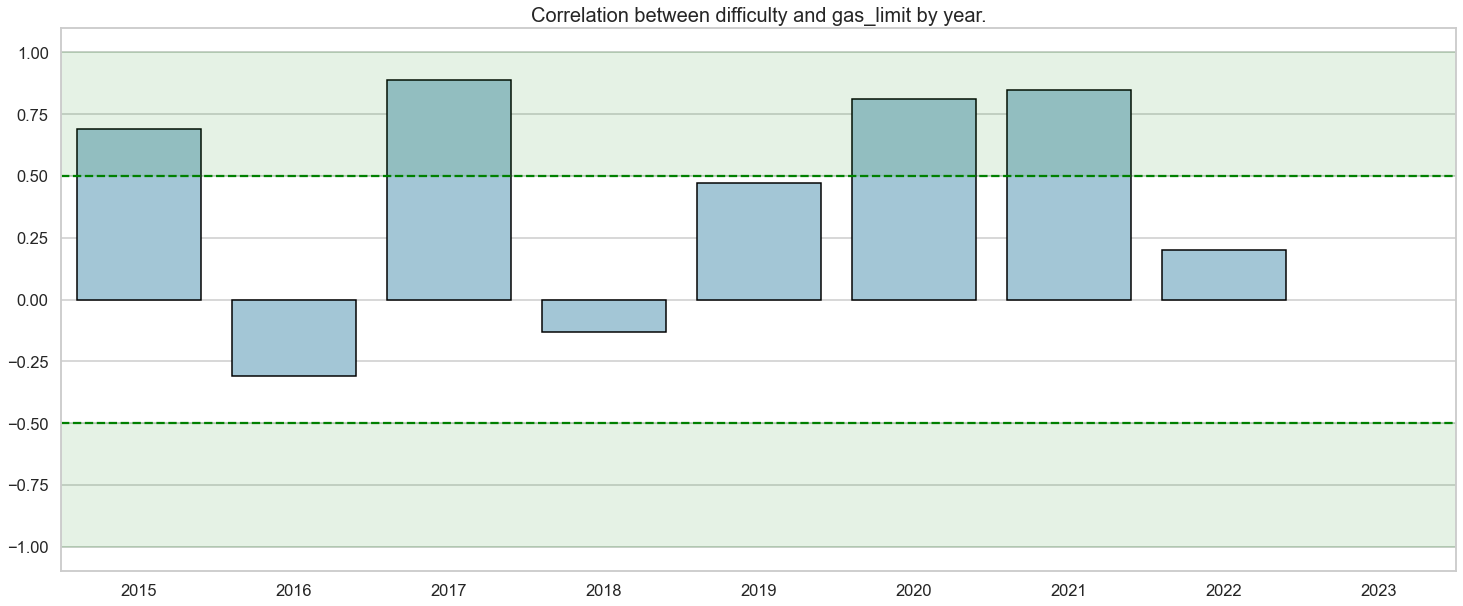

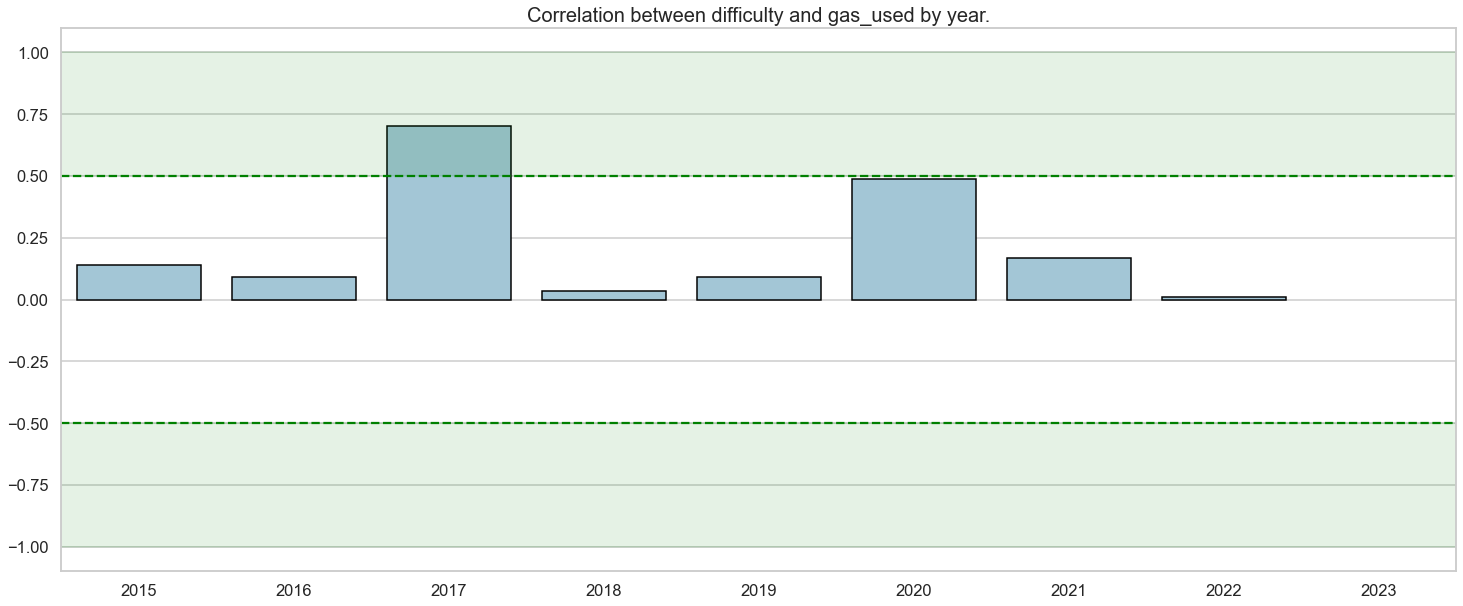

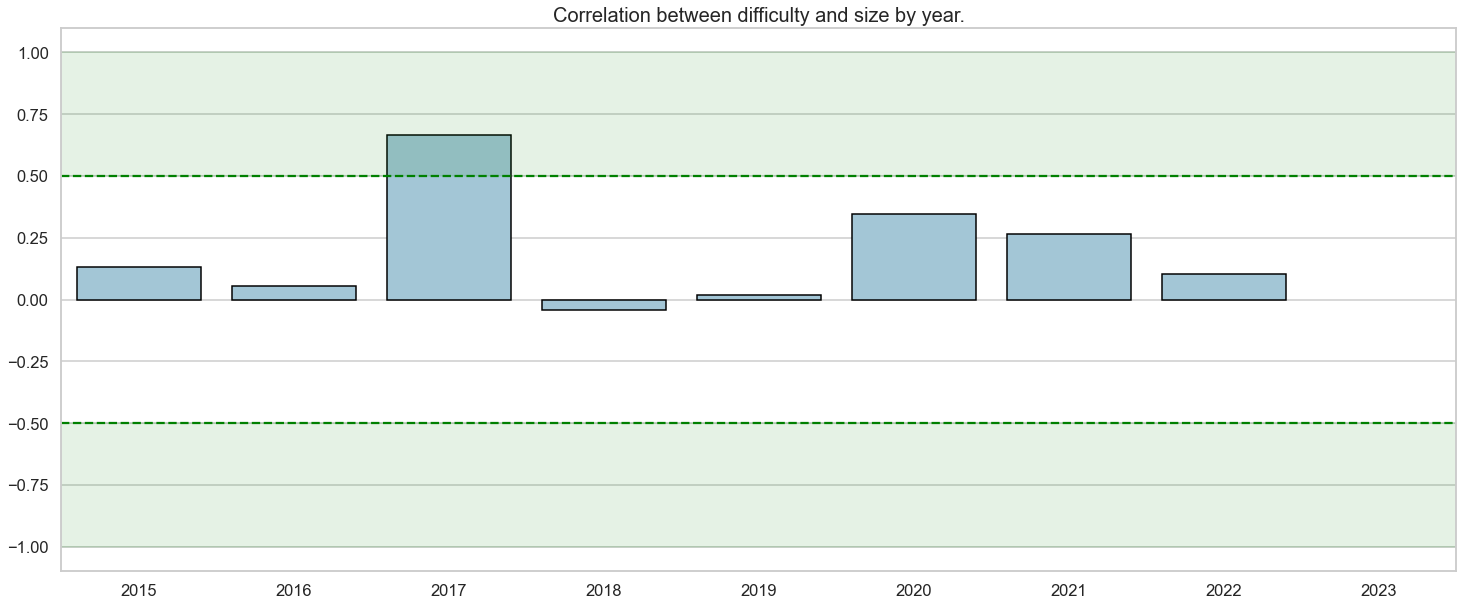

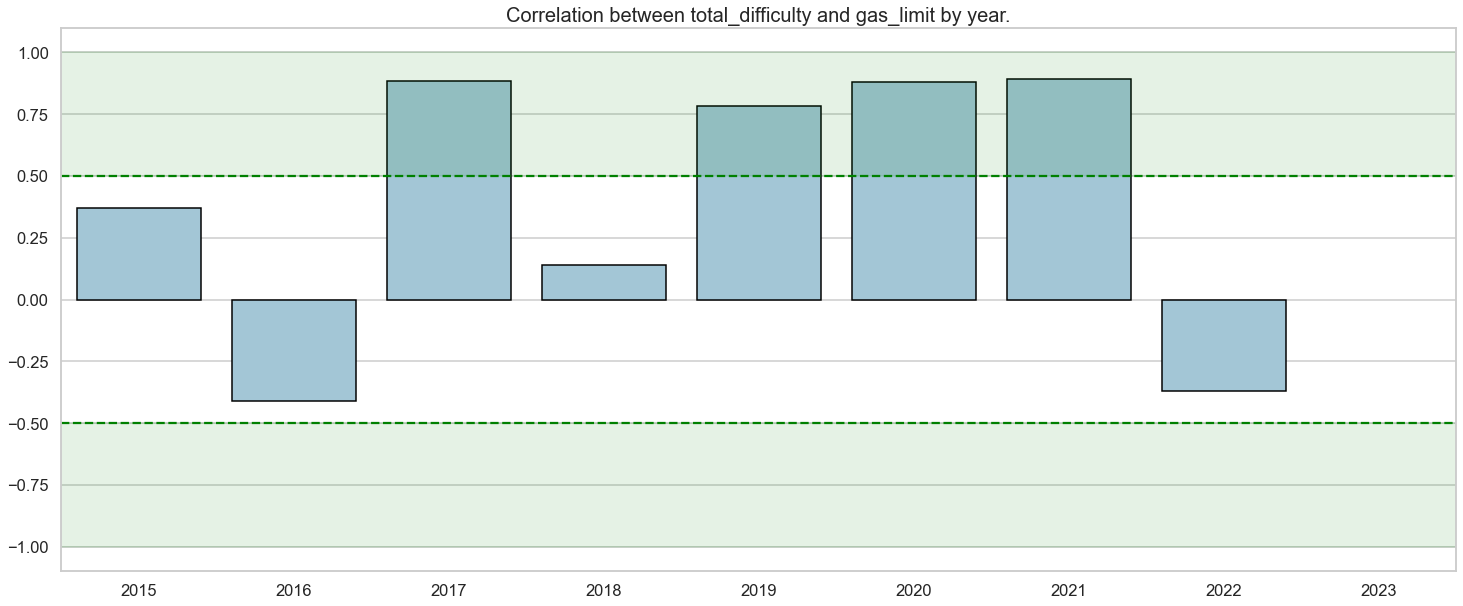

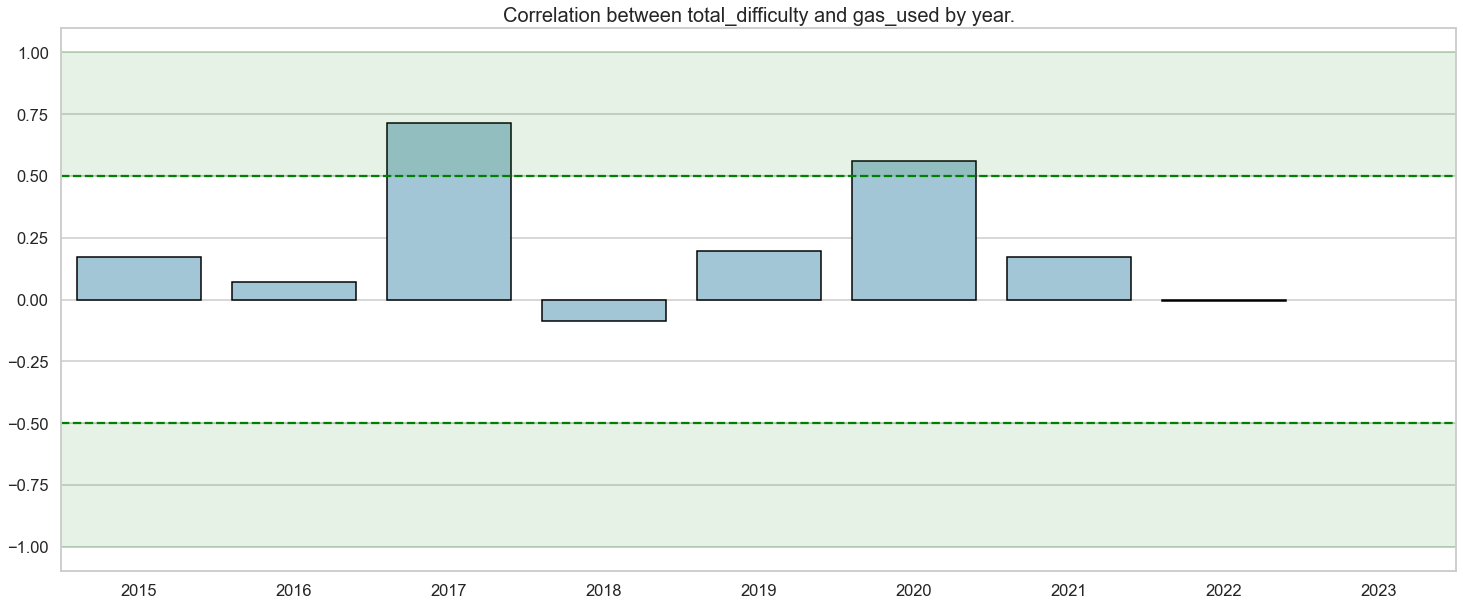

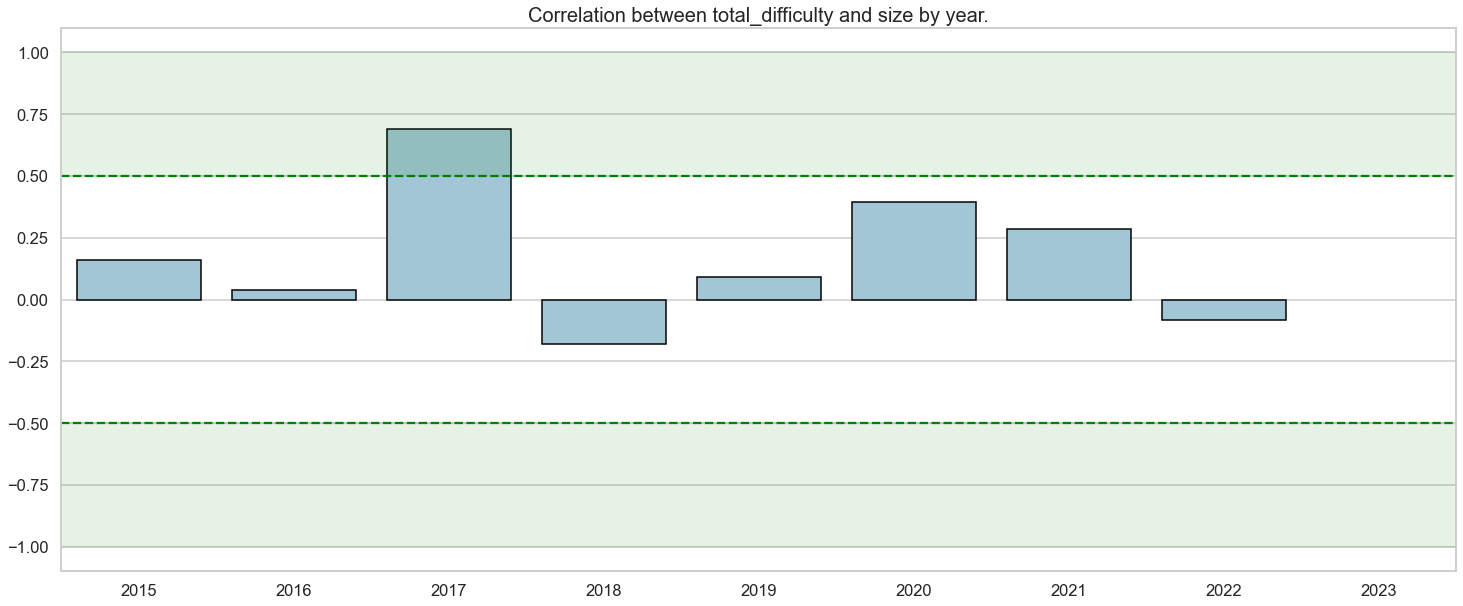

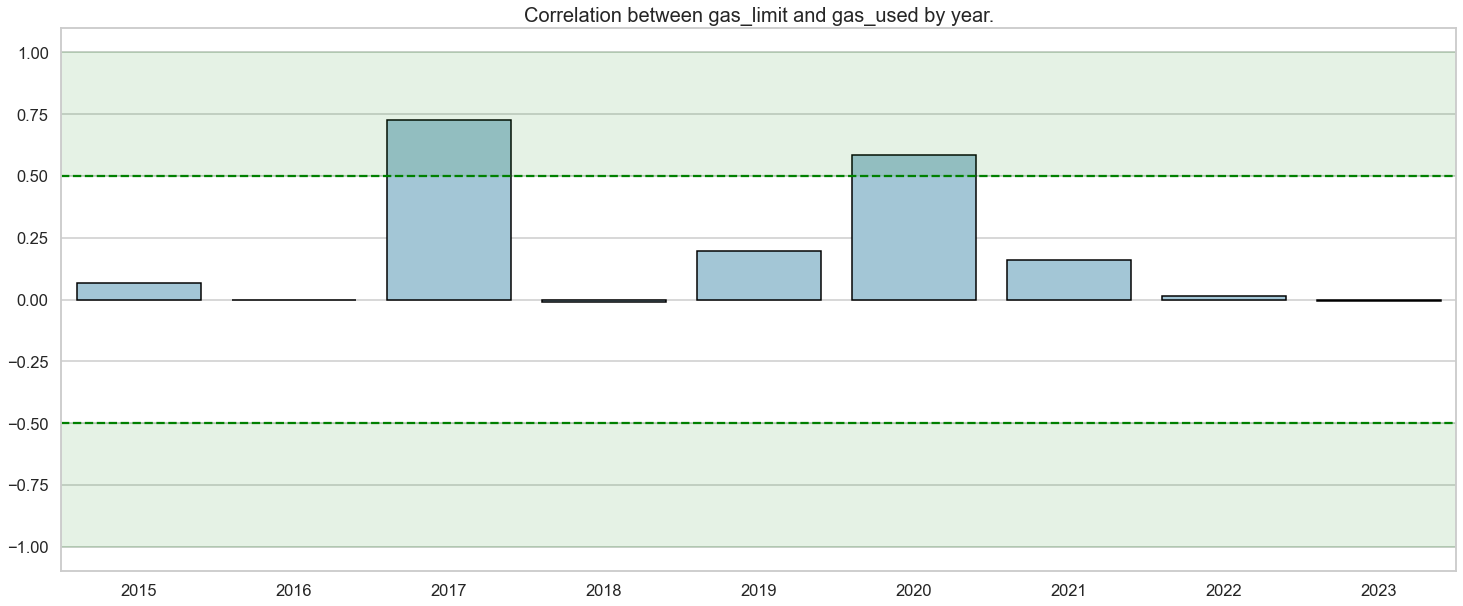

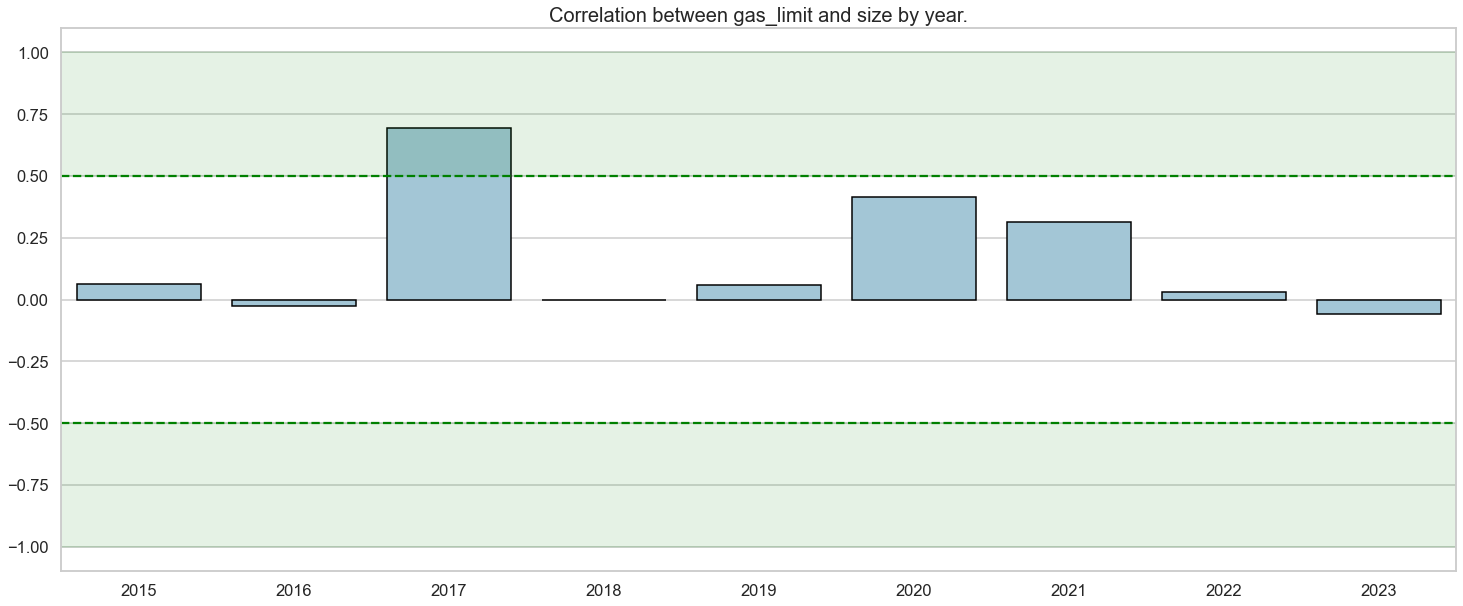

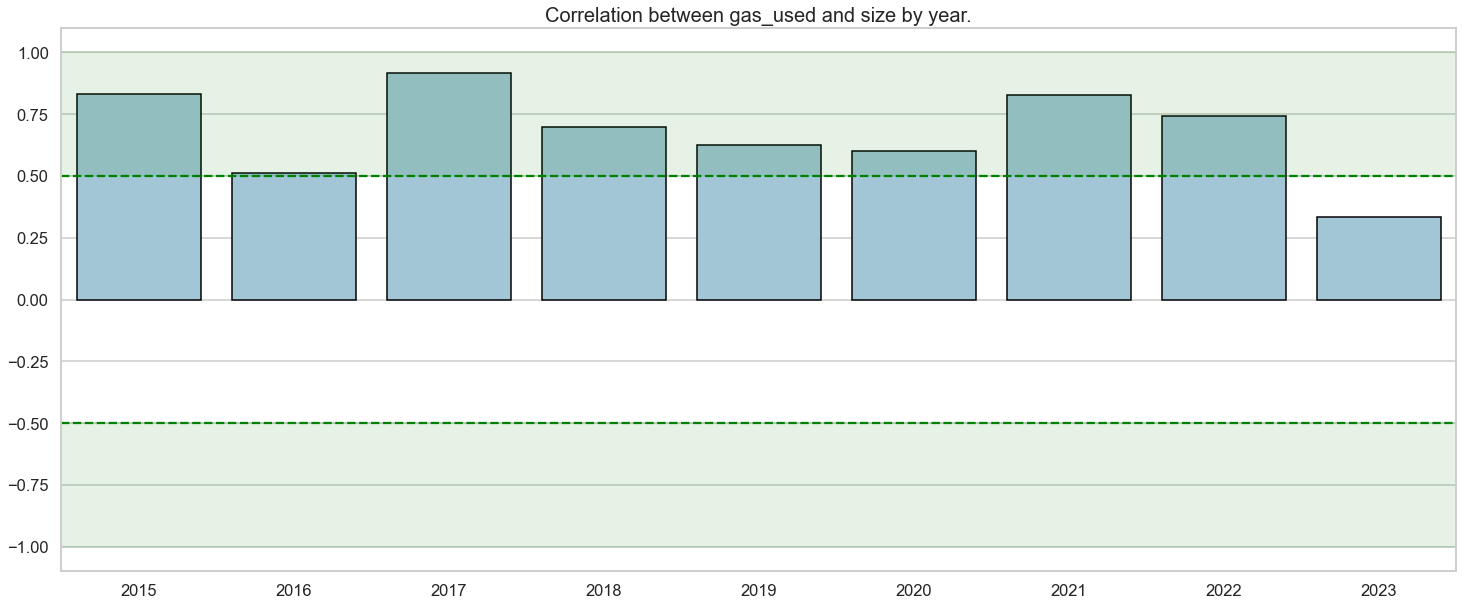

In [212]:
# gas limit vs. gas used

years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
columns = ['block_number', 'transactions_count', 'difficulty',
           'total_difficulty', 'gas_limit', 'gas_used', 'size']

for i in range(0,len(columns)-1):
    for j in range(1+i,len(columns)):
        temp_data = [corr_2015[columns[i]][columns[j]], corr_2016[columns[i]][columns[j]],
                         corr_2017[columns[i]][columns[j]], corr_2018[columns[i]][columns[j]],
                         corr_2019[columns[i]][columns[j]], corr_2020[columns[i]][columns[j]],
                         corr_2021[columns[i]][columns[j]], corr_2022[columns[i]][columns[j]],
                         corr_2023[columns[i]][columns[j]]]
        temp_data = pd.Series(data = temp_data, index = years)
        
        plt.figure(figsize=(25,10))
        sns.set_style("whitegrid")
        sns.set_context('talk')
        
        sns.barplot(temp_data.index, temp_data.values, color='#89CFF0', saturation = 0.5, edgecolor = 'black')
        
        plt.title(f'Correlation between {columns[i]} and {columns[j]} by year.', size = 20)
        plt.axhline(y = 0.5, color = 'green', linestyle = '--') 
        plt.axhline(y = -0.5, color = 'green', linestyle = '--')
        
        plt.axhspan(0.5, 1, alpha=0.1, color='green')
        plt.axhspan(-0.5, -1, alpha=0.1, color='green')
        
        plt.show()

---

### Dynamics by year

In [175]:
df_temp = df.iloc[::1000]
df_temp.block_timestamp = pd.to_datetime(df_temp.block_timestamp)
df_temp['year'] = df_temp['block_timestamp'].dt.year
df_temp['month'] = df_temp['block_timestamp'].dt.month

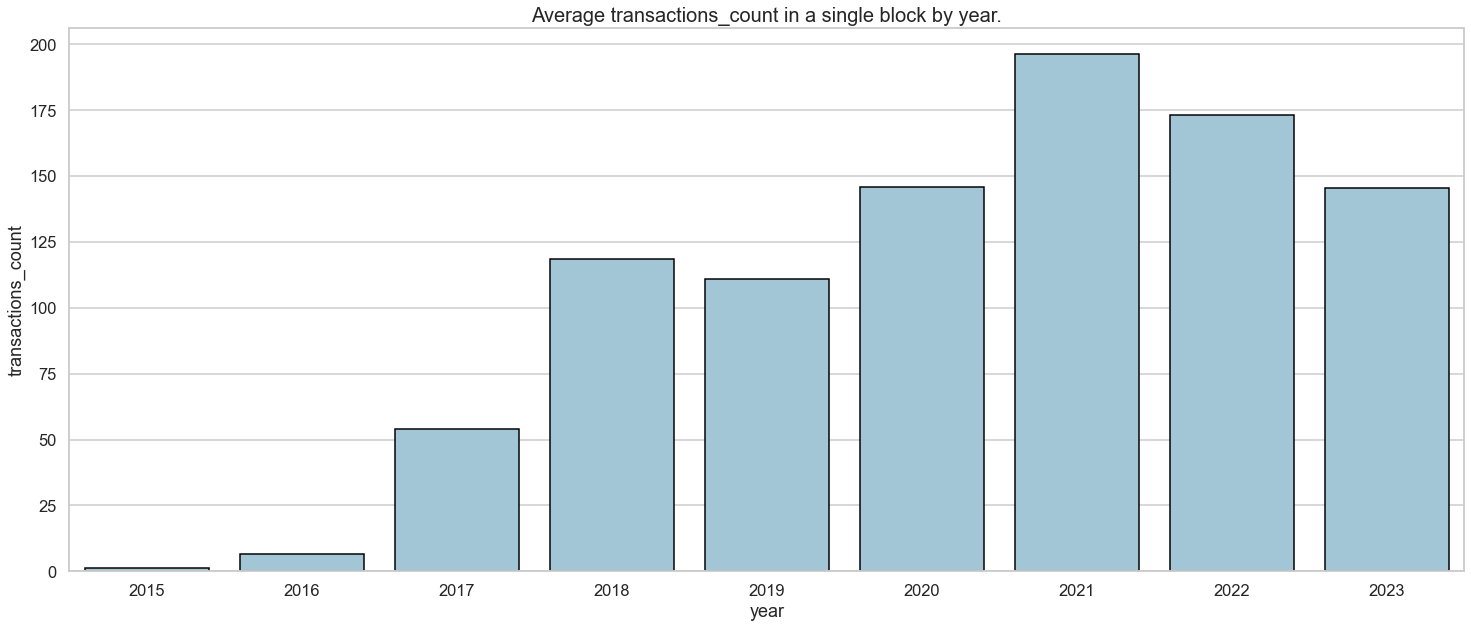

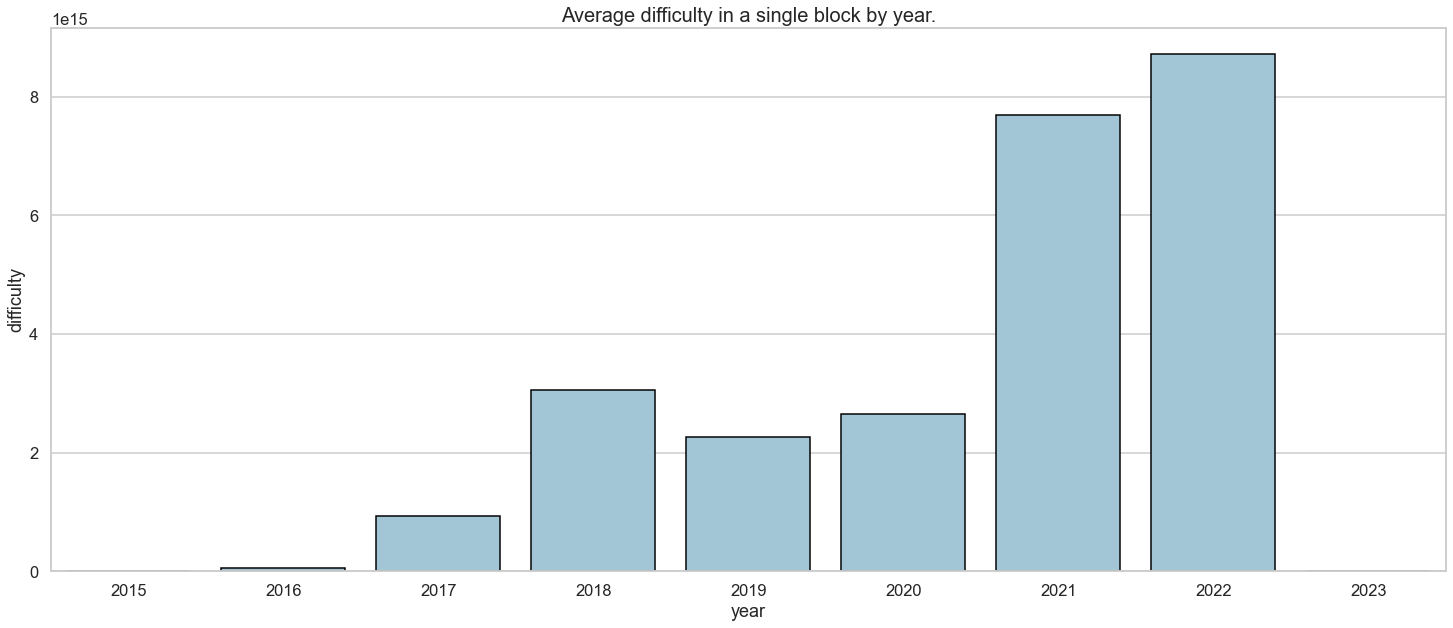

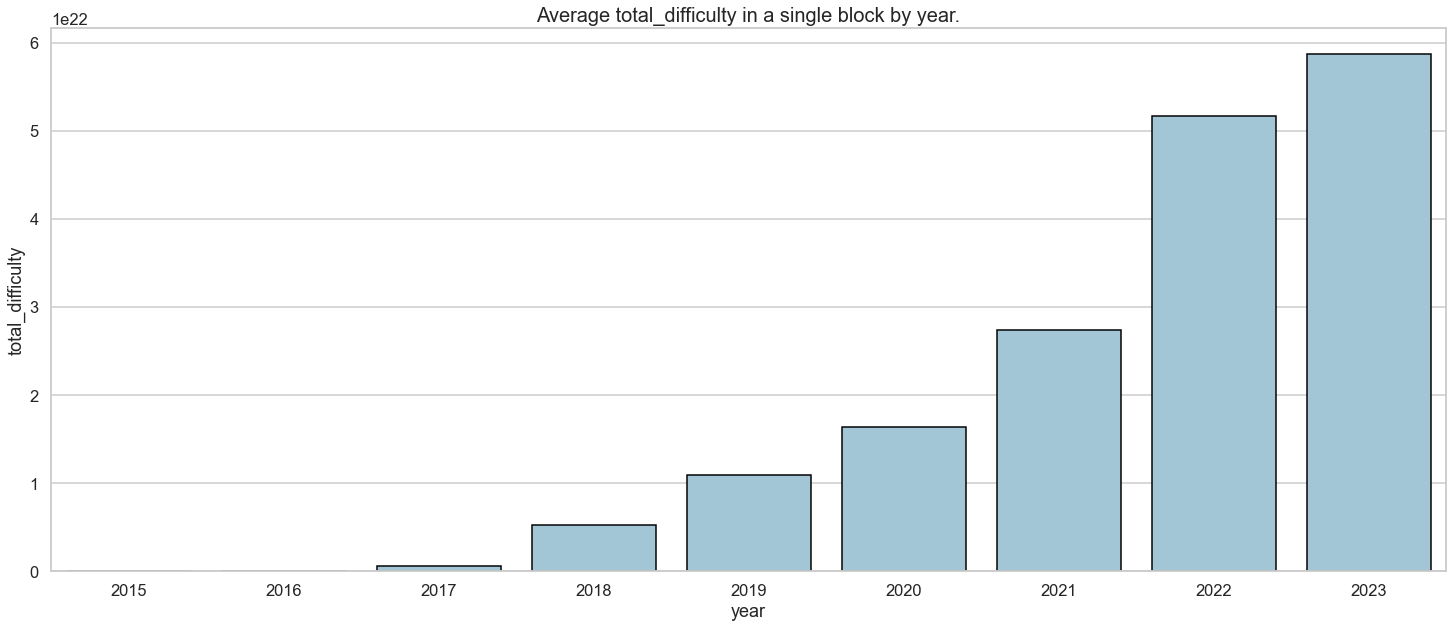

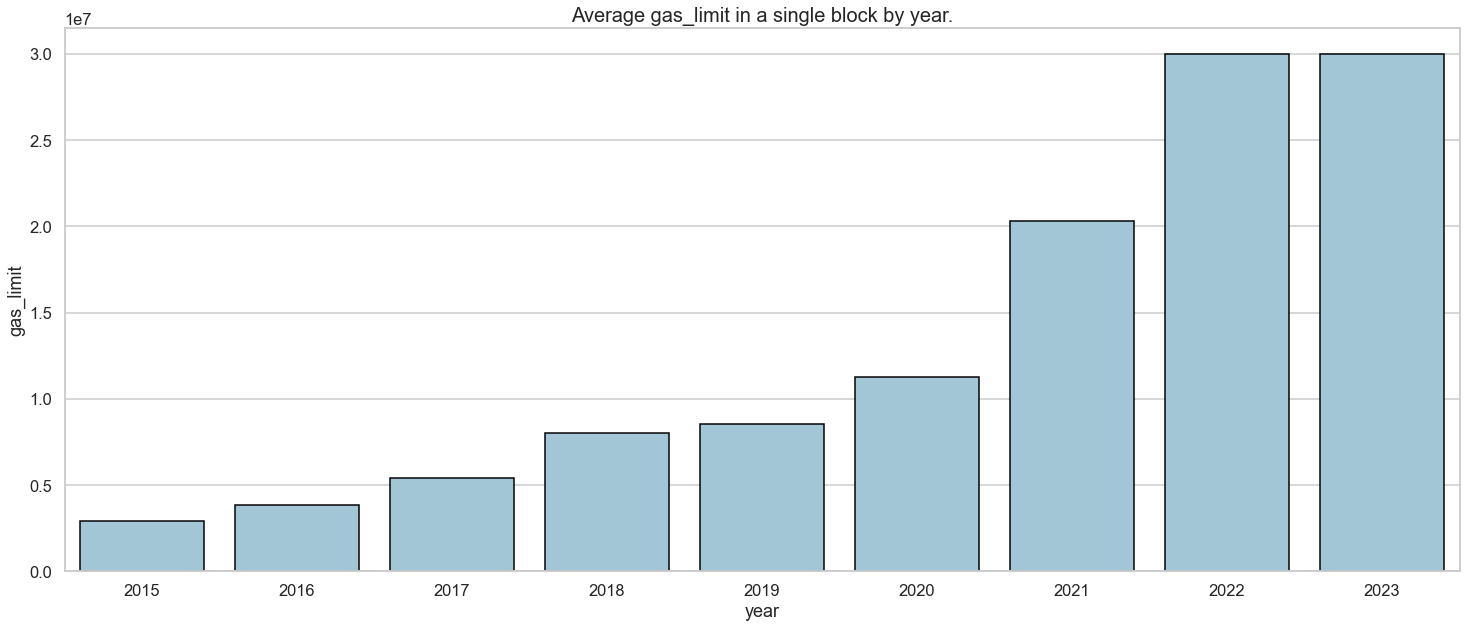

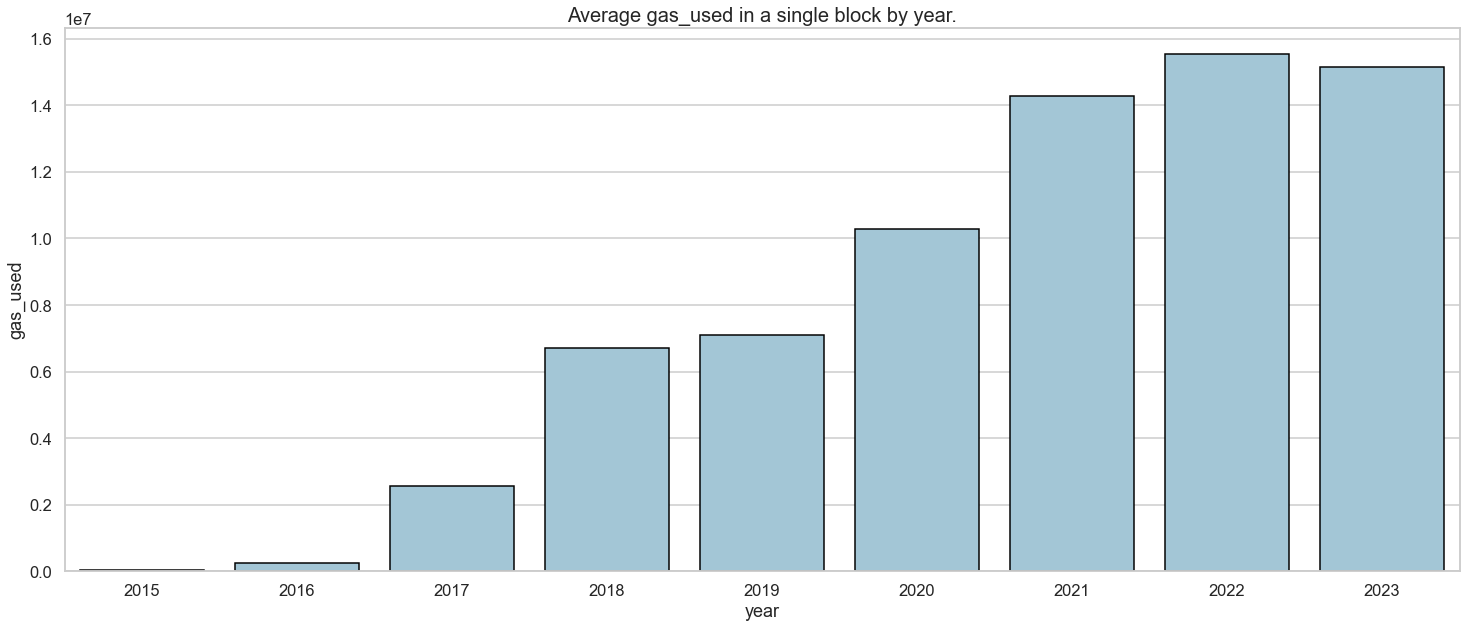

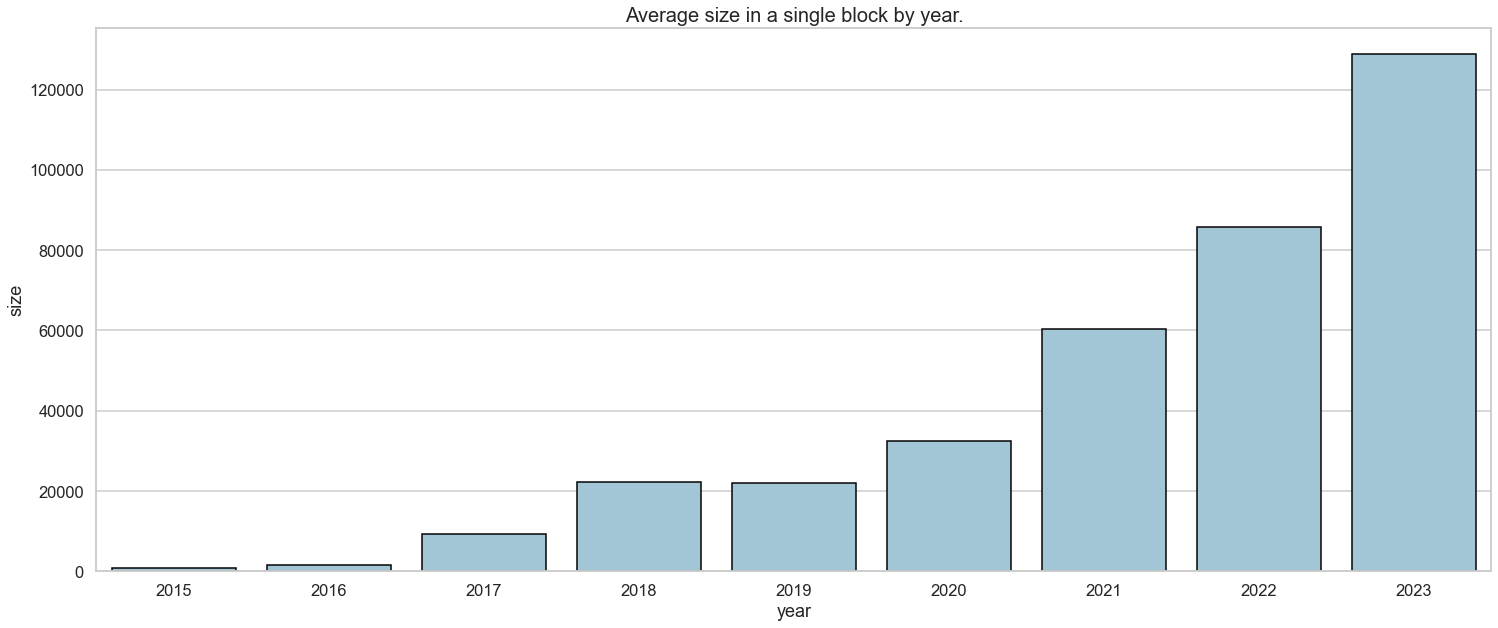

In [174]:
columns = ['transactions_count', 'difficulty', 'total_difficulty', 'gas_limit', 'gas_used', 'size']
target = 'year'

for column in columns:
    temp = df_temp.groupby(target, as_index=False)[column].mean()
    
    plt.figure(figsize=(25,10))
    sns.set_style("whitegrid")
    sns.set_context('talk')
        
    sns.barplot(data = temp, x = target, y = column, color='#89CFF0', saturation = 0.5, edgecolor = 'black')

    plt.title(f'Average {column} in a single block by year.', size = 20)

    plt.show()

### Dynamics by month

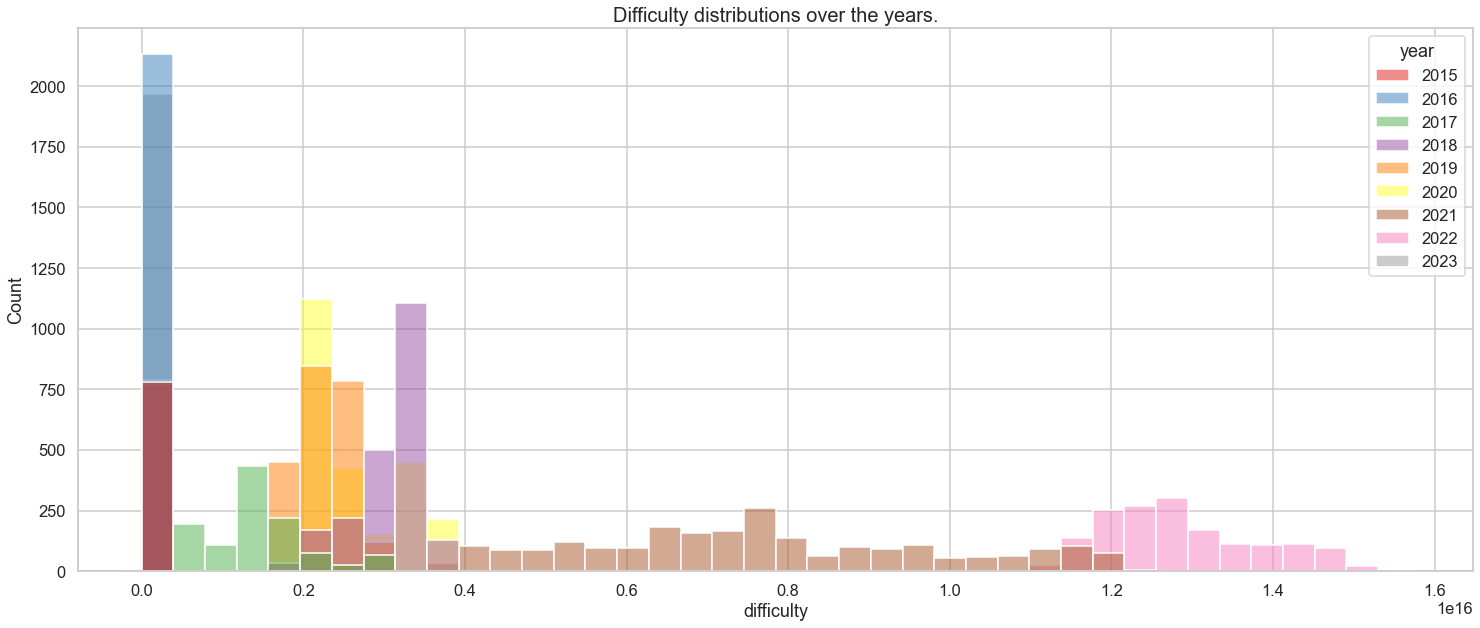

In [237]:
plt.figure(figsize = (25,10))

sns.histplot(data = df_temp, x = 'difficulty', hue = 'year', bins = 40, palette = 'Set1')

plt.title('Difficulty distributions over the years.', size = 20)

plt.show()

In [244]:
df_temp['gas_ratio'] = df_temp['gas_used'] / df_temp['gas_limit']
huy = df_temp.groupby('year', as_index = False)['gas_ratio'].mean()

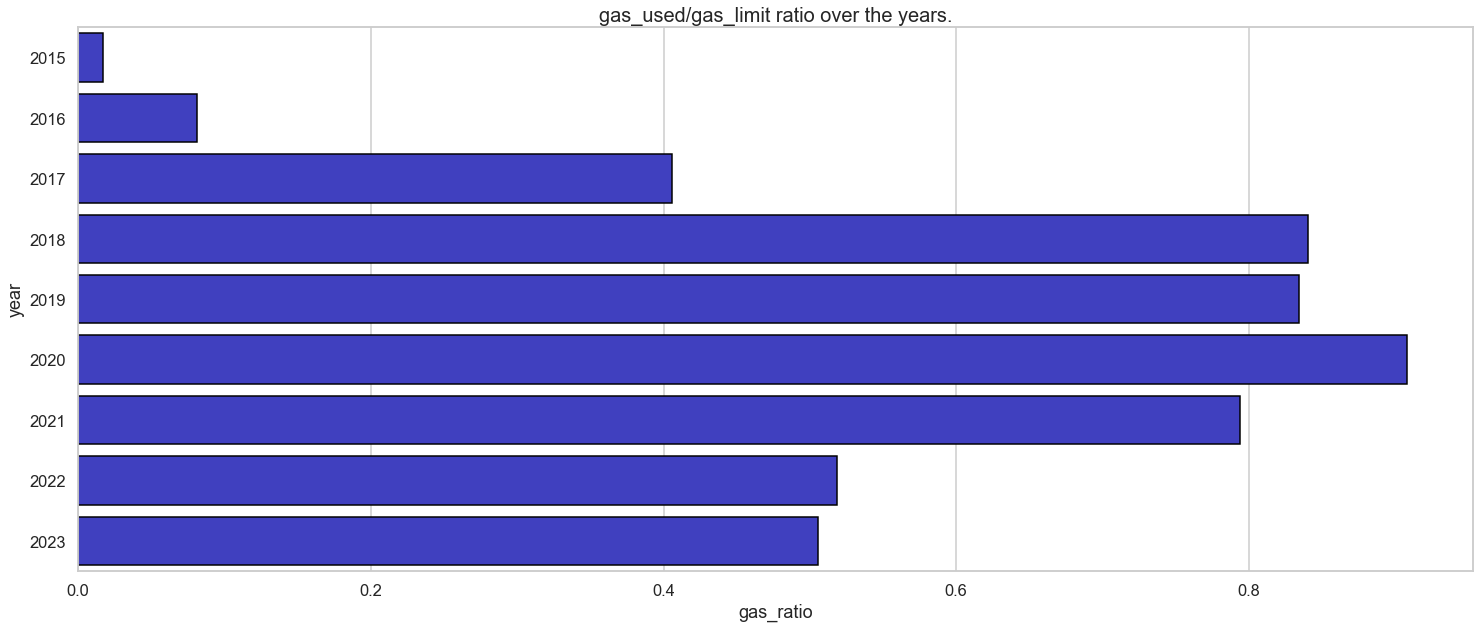

In [253]:
plt.figure(figsize=(25,10))
sns.set_style("whitegrid")
sns.set_context('talk')
        
sns.barplot(data = huy, orient = 'h', y = 'year', x = 'gas_ratio', color = 'blue', saturation = 0.5, edgecolor = 'black')

plt.title(f'gas_used/gas_limit ratio over the years.', size = 20)

plt.show()

In [279]:
df.block_timestamp = pd.to_datetime(df.block_timestamp)
df['block_time'] = df['block_timestamp'].diff().fillna(timedelta(0)).apply(lambda x: x.total_seconds() / 60)

MemoryError: Unable to allocate 279. MiB for an array with shape (18277539,) and data type complex128

In [287]:
new_df = df[::100]
new_df.block_timestamp = pd.to_datetime(new_df.block_timestamp)
new_df['block_time'] = new_df['block_timestamp'].diff().fillna(timedelta(0)).apply(lambda x: x.total_seconds() / 60)